In [4]:
import pygame.mixer
pygame.init()
pygame.display.set_mode((800,600), pygame.HWSURFACE | pygame.DOUBLEBUF)
pygame.mixer.pre_init(44100, -16, 2)
pygame.mixer.music.load('F:\\Coding\\py\\py3\\experiment_test\\0040.mp3')
pygame.mixer.music.play(0)

In [13]:
import pygame
import numpy as np
import math
import time

sample_rate = 44100
bits = 16
duration = 2
total_sample = int(sample_rate*2)
#setup our numpy array to handle 16 bit ints, which is what we set our mixer to expect with "bits" up above
sound = np.zeros((total_sample, 2), dtype = numpy.int16)
max_sample = 2**(bits - 1) - 1

#convert the frequences to sinusoid, and put them into the sound object

for s in range(total_sample):
    t = float(s)/sample_rate    # time in seconds
    sound[s] = int(round(max_sample*math.sin(2*math.pi*1000*t)))

#淡入淡出背景音音轨5ms
segment = int(44100*0.01)
start = sound[:,0][:segment]*np.array(list(range(segment)))//segment
start = np.array(start,int)
end = sound[:,0][-segment:]*np.array(list(range(segment,0,-1)))//segment
end = np.array(end,int)
sound[:,0][:segment] = start
sound[:,0][-segment:] = end
sound[:,1][:segment] = start
sound[:,1][-segment:] = end


#pygame environment
pygame.mixer.pre_init(sample_rate, -bits, 2)
pygame.init()
pygame.display.set_mode((800,600), pygame.HWSURFACE | pygame.DOUBLEBUF)
music = pygame.sndarray.make_sound(sound)
music.play(0)
time.sleep(duration)
pygame.quit()

In [7]:
sound[:,0]

array([     0,   4653,   9211, ..., -13583,  -9211,  -4653], dtype=int16)

In [ ]:
import wave 
import struct 
import matplotlib.pyplot as plt 
 
data_set = [] 
f = wave.open('2.0@2_0.5.wav', 'r') 
print('[+] WAV parameters ',f.getparams() )
print('[+] No. of Frames ',f.getnframes() )
for i in range(f.getnframes()): 
    single_frame = f.readframes(1)
    sint = struct.unpack('<h', single_frame)[0]
    data_set.append(sint) 
f.close() 
plt.plot(data_set) 
plt.ylabel('Amplitude')
plt.xlabel('Time') 
plt.show()

In [40]:
%pylab inline
import wave 
import struct 
import matplotlib.pyplot as plt 

## 制作主音轨
wr1 = wave.open('G:/English/word/词以类记/006环境.wav', 'r') 
par1 = list(wr1.getparams()) # Get the parameters from the input.

# 读取9s后的数据
trim = 44100*9 
wr1.readframes(trim)
primary = wr1.readframes(wr1.getnframes()-trim)

da1 = np.fromstring(primary, dtype=np.int16)
da1 = np.append(repeat([0,0],44100*5), da1)
wr1.close()

## 制作背景音音轨
wr2 = wave.open('D:/Tsuki Kasa.wav', 'r') 
par2 = list(wr2.getparams()) # Get the parameters from the input.

if par2[3]>par1[3]:
    da2 = np.fromstring(wr2.readframes(wr.getnframes()-1), dtype=np.int16)
else:
    da2 = np.fromstring(wr2.readframes(wr2.getnframes()), dtype=np.int16)
    # 重复此sound,直到和主音轨长度一致
    da2_t = []
    while len(da2_t)<len(da1):
        da2_t = np.append(da2_t,da2)
    da2 = da2_t[:len(da1)]

#淡入淡出背景音音轨1s
start = da2[:44100]*np.array(list(range(44100)))//44100
start = np.array(start,int)
end = da2[-44100:]*np.array(list(range(44100,0,-1)))//44100
end = np.array(end,int)
da2[:44100] = start
da2[-44100:] = end

wr2.close()

da3 = da1 + da2
ns = np.column_stack(da3).ravel().astype(np.int16)

with wave.open('G:/English/word/006环境.wav', 'w') as writer:
    par[3] = 0 # The number of samples will be set by writeframes
    writer.setparams(tuple(par)) # Use the same parameters as the input file.
    writer.writeframes(ns.tostring())


Populating the interactive namespace from numpy and matplotlib


In [15]:
import wave 
wr1 = wave.open('F:\\Coding\\py\\py3\\experiment_test\\1000hz.wav', 'r') 
par1 = list(wr1.getparams()) # Get the parameters from the input.
print(par1)

[1, 2, 44100, 17640, 'NONE', 'not compressed']


In [16]:
17640/44100

0.4

In [ ]:

#单文件测试

%pylab inline
import wave 
import struct 
import matplotlib.pyplot as plt 

data_set = [] 
wr = wave.open('G:/English/word/词以类记/006环境.wav', 'r') 

par = list(wr.getparams()) # Get the parameters from the input.
par[3] = 0 # The number of samples will be set by writeframes

trim = 44100*9 # Read and process 1 second at a time.
wr.readframes(trim)
blank = np.fromstring(wr.readframes(1), dtype=np.int16)
da = np.fromstring(wr.readframes(wr.getnframes()-trim), dtype=np.int16)
da = np.append(repeat(blank,44100*9), da)
ns = np.column_stack(da).ravel().astype(np.int16)
wr.close()

with wave.open('G:/English/word/006环境.wav', 'w') as writer:
    writer.setparams(tuple(par)) # Use the same parameters as the input file.
    writer.writeframes(ns.tostring())


In [10]:
with wave.open('G:/English/word/006环境.wav', 'w') as writer:
    writer.setparams(tuple(par)) # Use the same parameters as the input file.
    writer.writeframes(ns.tostring())

In [3]:
%pylab inline
import wave 
import struct 
import matplotlib.pyplot as plt 
import os

path = 'G:/English/word/词以类记－TOEFL.iBT词汇/'

for file in os.listdir(path): 
    if '.mp3' not in file:
        continue
    wr = wave.open(os.path.join(path, file), 'r')
    par = list(wr.getparams()) # Get the parameters from the input.
    # This file is stereo, 2 bytes/sample, 44.1 kHz.
    par[3] = 0 # The number of samples will be set by writeframes

    trim = 44100*9 # Read and process 1 second at a time.
    wr.readframes(trim)
    blank = np.fromstring(wr.readframes(1), dtype=np.int16)
    da = np.fromstring(wr.readframes(wr.getnframes()-trim), dtype=np.int16)
    da = np.append(repeat(blank,44100*5), da)
    ns = np.column_stack(da).ravel().astype(np.int16)
    wr.close()

    with wave.open('G:/English/word/词以类记/' + file, 'w') as writer:
        writer.setparams(tuple(par)) # Use the same parameters as the input file.
        writer.writeframes(ns.tostring())
    

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from matplotlib.mlab import find
import pyaudio
import numpy as np
import math
from array import array
from sys import byteorder

noteStrings = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

def noteFromPitch( frequency ):
    noteNum = 12 * (math.log( frequency / 440 )/math.log(2) )
    return round( noteNum ) + 69

def noteName(noteID):
    distance2C = noteID -60
    return noteStrings[distance2C%12],distance2C//12+2

chunk = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 20

def Pitch(signal):
    signal = np.fromstring(signal, 'Int16');
    crossing = [math.copysign(1.0, s) for s in signal]
    index = find(np.diff(crossing));
    return round(len(index) *RATE /(2*np.prod(len(signal))))

p = pyaudio.PyAudio()
stream = p.open(format = FORMAT,channels = CHANNELS,rate = RATE,input = True,output = True,frames_per_buffer = chunk)

lastNote = -1
sheet = []
for i in range(0, RATE // chunk * RECORD_SECONDS):
    data = stream.read(chunk)
    Frequency=Pitch(data)
    snd_data = array('h', data)
    if byteorder == 'big':
        snd_data.byteswap()
    if max(snd_data) >500:
        note = noteFromPitch(Frequency)
        if lastNote != note:
            lastNote = note
            print(noteName(note))
#     else:
#         note = 0
#     sheet.append(note)

# plot([sum(sheet[i-2:i+3])//4 for i in range(2,len(sheet)-1)], 'ro')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


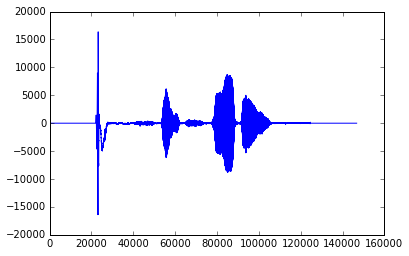

In [103]:
%pylab inline
fs, sig = wavfile.read('2015-03-26_15_25_27.wav')
plot(sig)

In [7]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise(ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise(ValueError, "Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    s=numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y